In [5]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator  # type: ignore

log_paths = {
    "4-bit": "local/output/runs/current/events.out.tfevents.1750999416.r1-distil-qapo-rollout-only-v1-0.595427.0",
    "3-bit": "local/output/runs/current/events.out.tfevents.1751011351.r1-distil-qapo-rollout-only-v1-0.686354.0",
    "2-bit": "local/output/runs/current/events.out.tfevents.1751024186.r1-distil-qapo-rollout-only-v1-0.757479.0",
    "2-bit-4-epoch": "local/output/runs/current/events.out.tfevents.1751123862.r1-distil-qapo-rollout-only-v1-0.947428.0",
    "1.58-bit": "local/output/runs/current/events.out.tfevents.1751075892.r1-distil-qapo-rollout-only-v1-0.826865.0",
    "1.58-bit-4-epoch": "local/output/runs/current/events.out.tfevents.1751163966.r1-distil-qapo-rollout-only-v1-0.955317.0",
    "1-bit": "local/output/runs/current/events.out.tfevents.1751089012.r1-distil-qapo-rollout-only-v1-0.881129.0",
}

In [6]:
logs = {key: EventAccumulator(path) for key, path in log_paths.items()}

for log in logs.values():
    log.Reload()

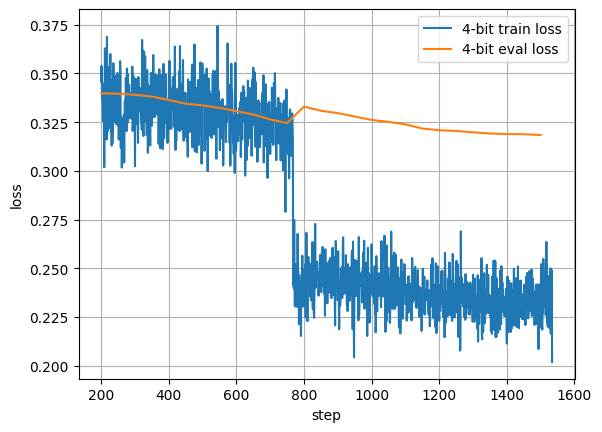

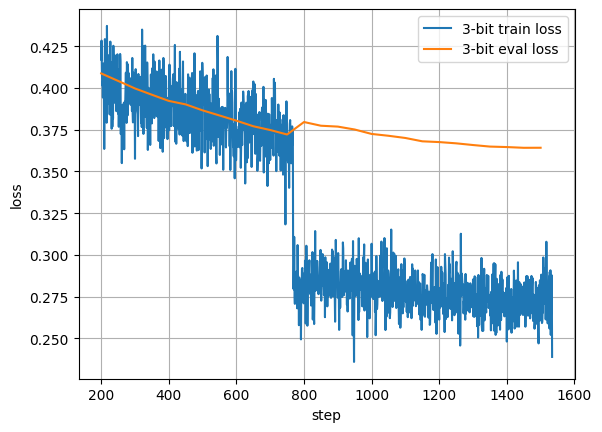

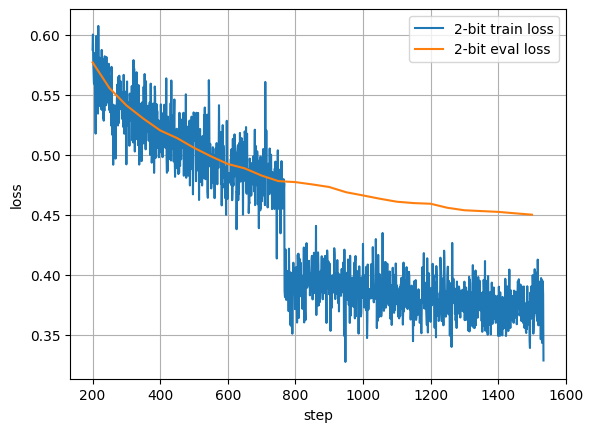

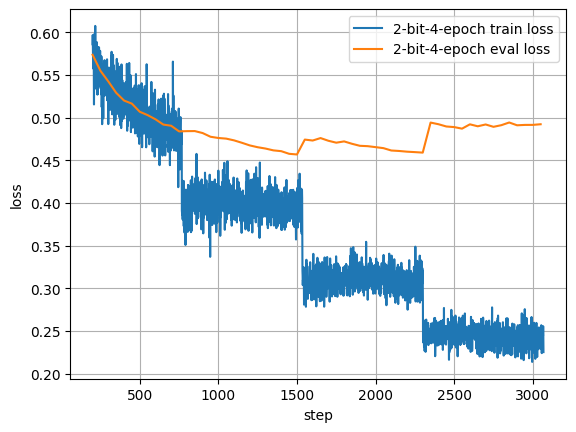

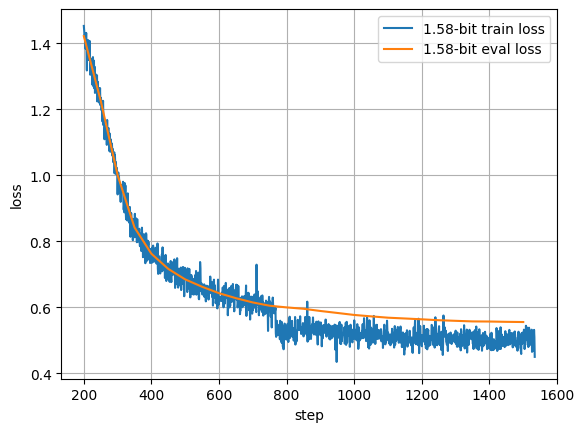

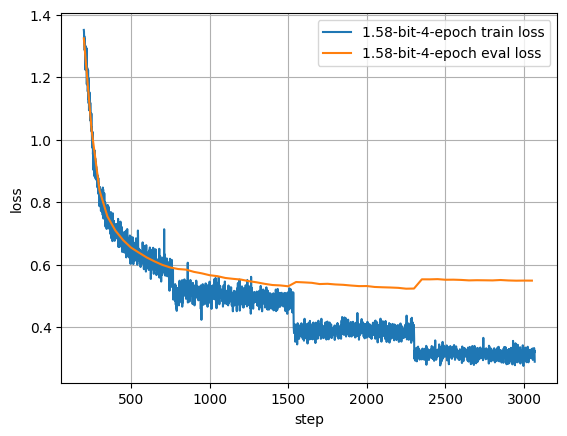

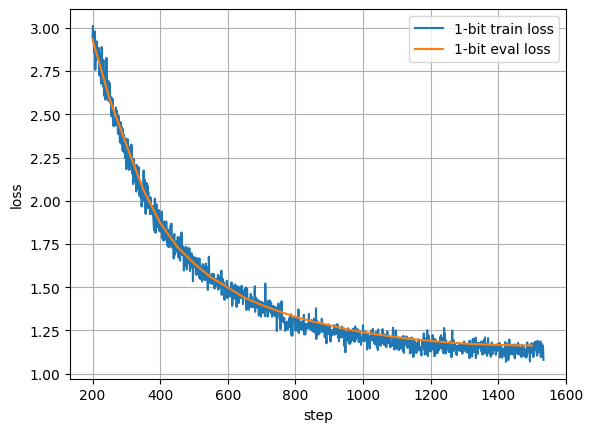

In [9]:
import matplotlib.pyplot as plt
import numpy as np

for label, ea in logs.items():
    for key in ["train/loss", "eval/loss"]:
        step = np.array([event.step for event in ea.Scalars(key)])
        value = np.array([event.value for event in ea.Scalars(key)])
        mask = step >= 200
        plt.plot(step[mask], value[mask], label=label + " " + key.replace("/", " "))

    plt.grid()
    plt.xlabel("step")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

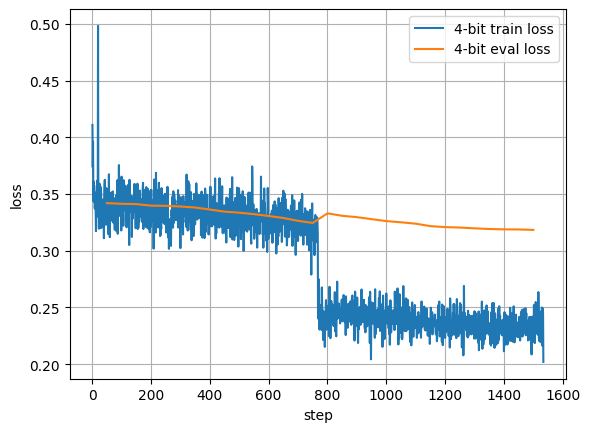

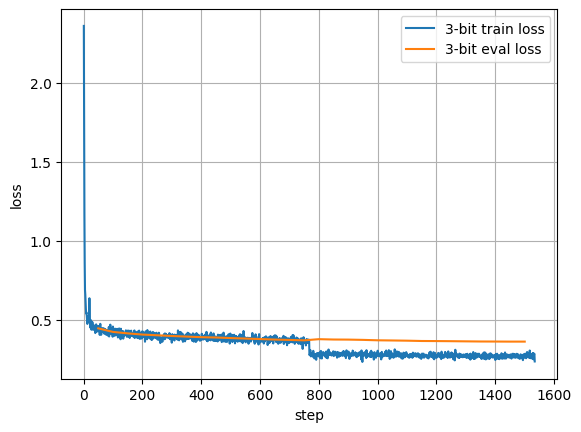

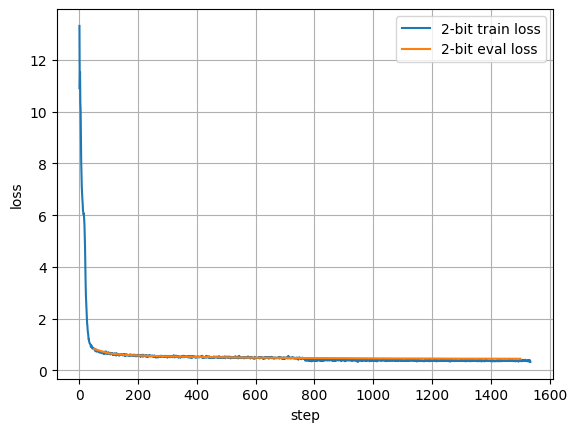

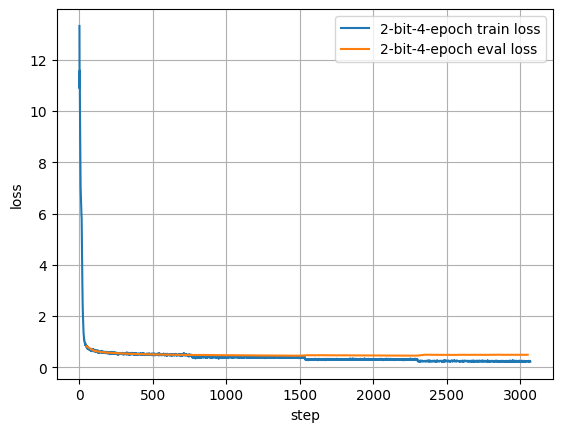

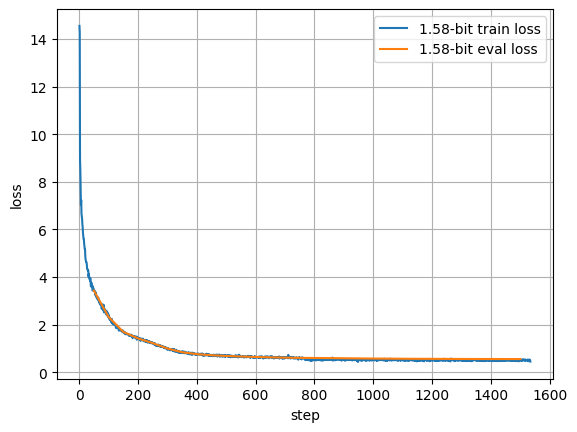

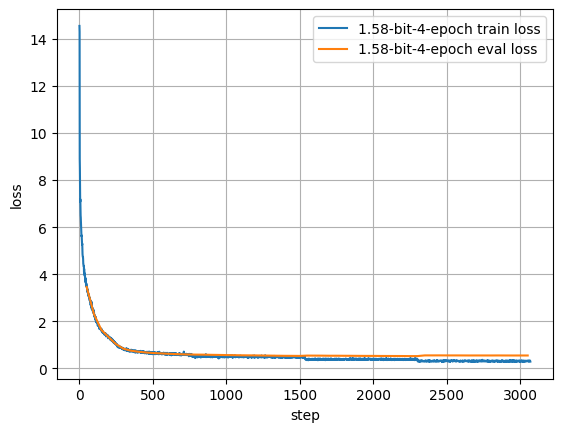

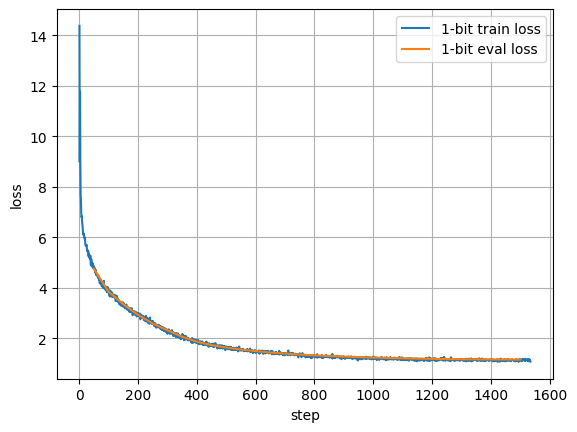

In [7]:
import matplotlib.pyplot as plt
import numpy as np

for label, ea in logs.items():
    for key in ["train/loss", "eval/loss"]:
        step = np.array([event.step for event in ea.Scalars(key)])
        value = np.array([event.value for event in ea.Scalars(key)])
        plt.plot(step, value, label=label + " " + key.replace("/", " "))

    plt.grid()
    plt.xlabel("step")
    plt.ylabel("loss")
    plt.legend()
    plt.show()